# Grafos

In [6]:
import graphviz as gv
import numpy as np
import pandas as pd

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

## Matriz de Adyacencia

In [3]:
%%file m.tng
0 1 0
1 0 1
0 1 0

Writing m.tng


C:\Users\HP\AppData\Local\Temp/ipykernel_16904/3888350783.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjm = np.loadtxt("m.tng",dtype=np.int)


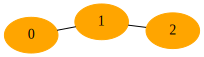

In [4]:
adjm = np.loadtxt("m.tng",dtype=np.int)
adjmShow(adjm)

## Lista de Adyacencia

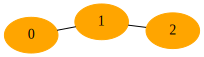

In [7]:
l1 = [[1],[0,2],[1]]
adjlShow(l1)

In [8]:
%%file l.txt
1
0 2
1

Writing l.txt


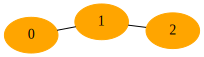

In [22]:
l2, _ = readAdjl("l.txt")
adjlShow(l2)

### BFS
##### Nos asegura que el camino que hallemos desde un nodo de partida (v) a un nodo de destino (u) sea, de todos los caminos posibles, aquel en el cual se recorra la menor cantidad de aristas posible realizando una búsqueda en anchura. Utiliza una cola
##### Este es un algoritmo de búsqueda no informada

In [30]:
%%file adjl.sample
1 2
0 2 3 6
0 1 4 5
1 5 7
2 6 7
2 3 7
1 4 7
3 4 5 6

Overwriting adjl.sample


In [31]:
def bfs(graph,start):
    n = len(graph)
    visited = [False]*n
    parent = [None]*n
    visited[start] = True
    queue = [start]
    while queue:
        v = queue.pop(0)
        for u in graph[v]:
            if not visited[u]:
                parent[u] = v
                visited[u] = True
                queue.append(u)
    return parent

[None, 0, 0, 1, 2, 2, 1, 3]


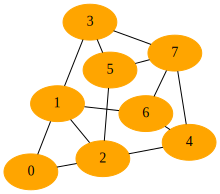

In [32]:
graph, _ = readAdjl("adjl.sample")
print(bfs(graph,0))
adjlShow(graph)

### DFS
#### DFS a diferencia de BFS solamente le importa hallar el camino, no le importa si es óptimo. Realiza una busqueda en profundidad que puede ser iterativa (usando una pila) o recursiva (usando el call stack de llamadas recursivas)
#### También es un algoritmo de búsqueda no informada

In [4]:
%%file dfs.txt
1 2
0 2 5 6
0 1 5
7
6
1 2 6 7
1 4 5 7
3 5 6

Writing dfs.txt


[1, 5, 0, 7, 6, None, 1, 6]
[2, 6, 1, 7, 6, None, 7, 5]
[None, 5, 5, None, None, None, 5, 5]


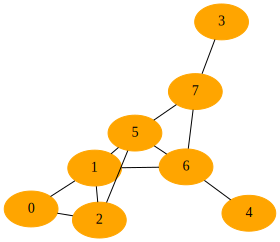

In [15]:
def dfs(graph,start):
    n = len(graph)
    parent = [None]*n
    visited = [False]*n
    def _dfs(v,p):
        if visited[v]:
            return
        visited[v] = True
        parent[v] = p;
        for u in graph[v]:
            _dfs(u,v)
    _dfs(start,None)
    return parent

def iterativeDfs(graph, start):
    n = len(graph)
    parent = [None]*n
    visited = [False]*n
    stack = [(start,None)]
    while stack:
        v, p = stack.pop()
        if visited[v]:
            continue
        visited[v] = True
        parent[v] = p
        for u in graph[v]:
            stack.append((u,v))
    return parent

graph, _ = readAdjl("dfs.txt")

def ids(graph,start,maxLevel):
    n = len(graph)
    parent = [None]*n
    visited = [False]*n
    level = 0
    maxi = maxLevel
    def _dfs(v,p,l):
        if l == maxi:
            return;
        if visited[v]:
            return
        visited[v] = True
        parent[v] = p;
        for u in graph[v]:
            _dfs(u,v,l+1)
    for i in range(5):
        _dfs(star)
    _dfs(start,None,level)
    return parent


print(dfs(graph,5))
print(iterativeDfs(graph,5))
print(ids(graph,5,2))
adjlShow(graph)